### <font color = 'green'> **Problem-Statement**

**Predicting the risk of CHD ten years in advance(coronary heart disease).**

Framingham Heart Study - In 1948, scientists and participants embarked on an ambitious project to identify risk factors for heart disease. Today, the study remains a world-class epicenter for cutting-edge heart, brain, bone, and sleep research.
The 10-year cardiovascular risk of an individual can be estimated with the Framingham Risk Score, including for individuals without known cardiovascular disease. The Framingham Risk Score is based on findings of the Framingham Heart Study.

You can refer to the research website here: https://www.framinghamheartstudy.org/fhs-risk-functions/hard-coronary-heart-disease-10-year-risk/

#### <font color = 'green'> **Attribute Information**
Variables used in this study:-
- **Demographic Variables** - Gender, Age in Years, Education.
- **Behavioral Factors** - Current Smoker, No. of cigarettes per day.
- **Medical History** - BP Medication, Prevalent Stroke, Prevalent Hypertension, Diabetes

In addition, data from the first medical examination was taken into account. This
included: Total Cholesterol, Blood Pressure, BMI, Heart Rate, and Glucose.

### <font color = 'green'> **Import necessary libraries and read the dataset.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn import metrics


In [2]:
df = pd.read_csv('framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0



### <font color = 'green'> **Exploratory Data Analysis**

<font size=3> Perform Necessary Exploratory Data Analysis.

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
male,4240.0,0.429245,0.495027,0.00,0.00,0.0,1.00,1.0
age,4240.0,49.580189,8.572942,32.00,42.00,49.0,56.00,70.0
education,4135.0,1.979444,1.019791,1.00,1.00,2.0,3.00,4.0
currentSmoker,4240.0,0.494104,0.500024,0.00,0.00,0.0,1.00,1.0
cigsPerDay,4211.0,9.005937,11.922462,0.00,0.00,0.0,20.00,70.0
BPMeds,4187.0,0.029615,0.169544,0.00,0.00,0.0,0.00,1.0
prevalentStroke,4240.0,0.005896,0.076569,0.00,0.00,0.0,0.00,1.0
prevalentHyp,4240.0,0.310613,0.462799,0.00,0.00,0.0,1.00,1.0
diabetes,4240.0,0.025708,0.158280,0.00,0.00,0.0,0.00,1.0
totChol,4190.0,236.699523,44.591284,107.00,206.00,234.0,263.00,696.0


In [6]:
print(df['TenYearCHD'].value_counts(normalize=True)*100)

0    84.811321
1    15.188679
Name: TenYearCHD, dtype: float64


### <font color = 'green'> **Data Preparation for model buidling.**

<font size=3> Q. Check for missing values and handle them with appropriate methods.

In [7]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [8]:
for column in df.columns:
    if df[column].dtype != 'object':
        mean = df[column].mean()
        df[column] = df[column].fillna(mean)
        
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

<font size=3> Q. Check for duplicate records and drop them.

In [9]:
df.duplicated().sum()

0

<font size=3> Q. Check for the presence of outliers and handle them with appropriate techniques.

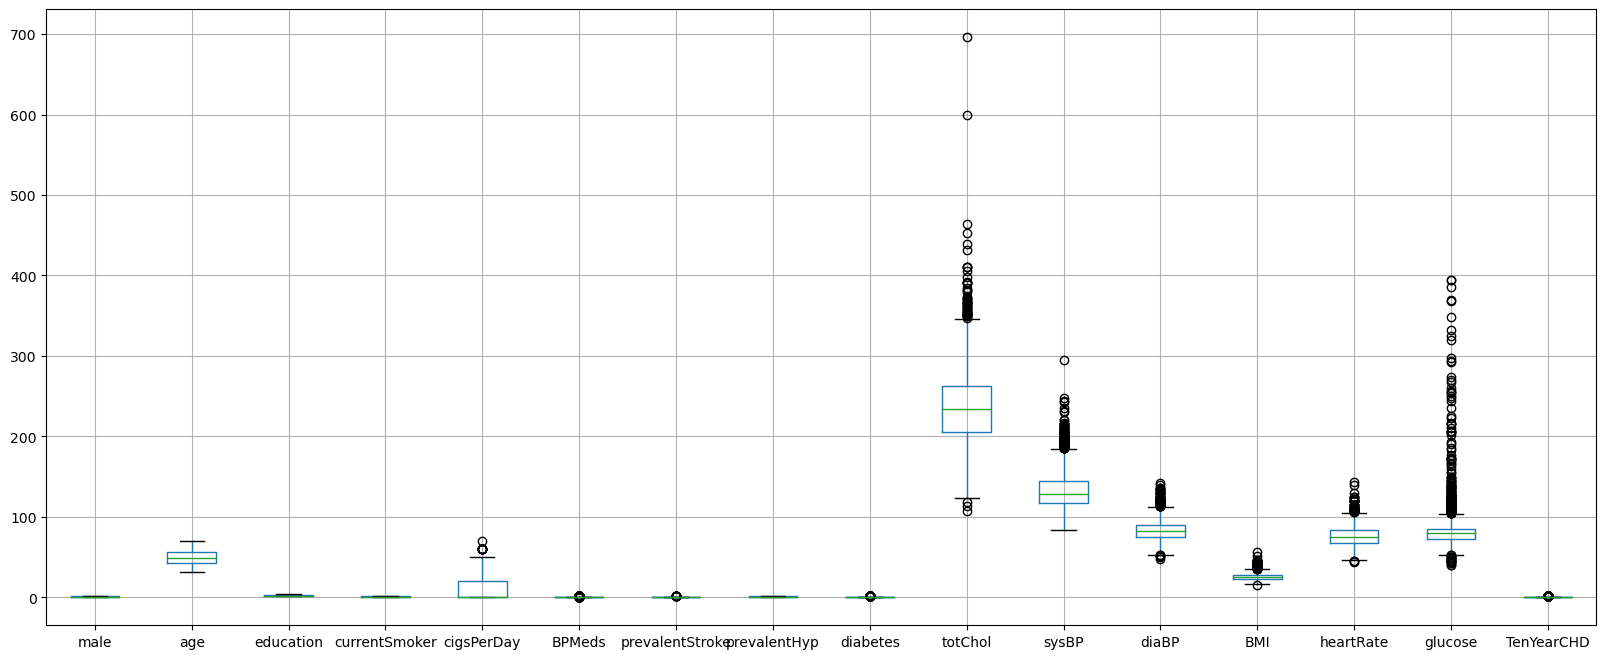

In [10]:
df.boxplot(figsize=(20,8))
plt.show()

In [11]:
import numpy as np

def rem_outlier(col):
    col = np.sort(col)  # Sort the array in-place
    Q1, Q3 = np.percentile(col, [25, 75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range


In [12]:
for column in df[['cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']].columns:
    lr,ur = rem_outlier(df[column])
    df[column] = np.where(df[column]> ur,ur,df[column])
    df[column] = np.where(df[column]< lr,lr,df[column])

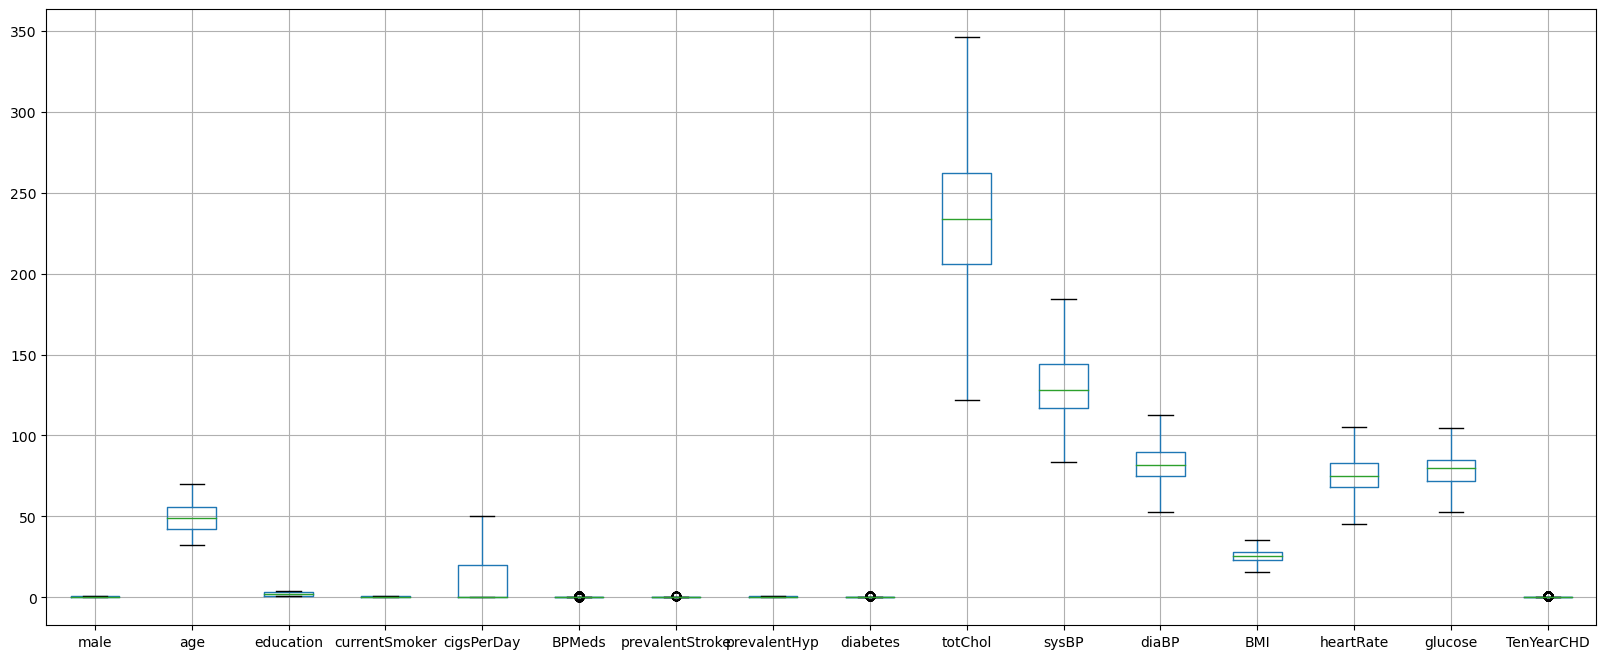

In [13]:
df.boxplot(figsize=(20,8))
plt.show();

In [14]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

<font size=3> Q. Split the dataset into two parts (i.e. 70% train and 30% test).

In [15]:
X =df.drop('TenYearCHD',axis=1)
y= df[["TenYearCHD"]]

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=1)

<font size=3> Q. Scale the data using appropriate approach.

In [16]:
ss = StandardScaler()
X_train.iloc[:,:] = ss.fit_transform(X_train.iloc[:,:])
X_test.iloc[:,:] = ss.transform(X_test.iloc[:,:])

In [17]:
X_train.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
4033,-0.854168,-0.084183,-0.964550,1.012886,0.504971,-0.177665,-0.068843,-0.668655,-0.156551,-0.071509,-0.935959,-0.232849,0.576830,1.724282,0.028631
3710,1.170729,-0.433793,1.013508,1.012886,1.773966,-0.177665,-0.068843,1.495540,-0.156551,-1.936053,0.441118,0.644679,-0.770401,-0.933446,-1.292795
1453,1.170729,-0.433793,-0.964550,1.012886,0.927969,-0.177665,-0.068843,-0.668655,-0.156551,1.014174,-0.670208,-0.057344,-0.765128,-1.533577,-0.499939
2425,-0.854168,1.547333,-0.964550,-0.987278,-0.764024,-0.177665,-0.068843,-0.668655,-0.156551,-0.165916,-0.573571,-0.057344,-0.026919,0.181085,-0.588035
1010,1.170729,-0.899941,-0.964550,1.012886,1.773966,-0.177665,-0.068843,-0.668655,-0.156551,-0.095111,-0.984278,-1.110377,0.690197,1.209883,0.028631


### <font color = 'green'> **Model buidling - Logistic Regression Model**

<font size=3> Q. Buid a logistic regression model and evaluate the model performance.

In [25]:
log = LogisticRegression()

In [27]:
log_model = log.fit(X_train, y_train)
log_model.coef_

array([[ 0.28666143,  0.46658098, -0.04061502,  0.0008527 ,  0.24785849,
         0.04985879,  0.04391125,  0.05839931,  0.10225284,  0.09105529,
         0.35977094, -0.07530212, -0.00577932,  0.01746178,  0.07245694]])

In [54]:
y_pred = log_model.predict(X_test)


In [45]:
print(log_model.score(X_train, y_train))
print(log_model.score(X_test, y_test))
print(log_model.score(X_test, y_pred))

0.8517520215633423
0.860062893081761
1.0


------
### Happy Learning :)
------